<a href="https://colab.research.google.com/github/lalitdadhich/Task2_TSF/blob/main/Task2TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Sparks Foundation- GRIP- Data Science and Business Analytics- Aug-2021**
#**Task 2:-Prediction using Unsupervised ML**
#**Author : LALIT DADHICH**
#**DataSet can be downloaded from this link :-https://bit.ly/3kXTdox**
#**Problem statement:**
#**From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**

**Importing The Dependencies**

In [1]:
# import libraries
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

**Reading and Loading the Data**

In [2]:
# Reading data
df = pd.read_csv('Iris.csv')
print("Data imported successfully")

Data imported successfully


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Data Pre-Processing**

In [4]:
df.rename(columns={'SepalLengthCm':'SepalLength', 
                               'SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'}, inplace=True)

In [5]:
df['Species'].replace({'Iris-virginica':'virginica','Iris-setosa':'setosa','Iris-versicolor':'versicolor'},inplace=True)

In [6]:
DeleteList=['Id']
df=df.drop(DeleteList, axis=1)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Basic Exploratory Data Analysis**

In [7]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


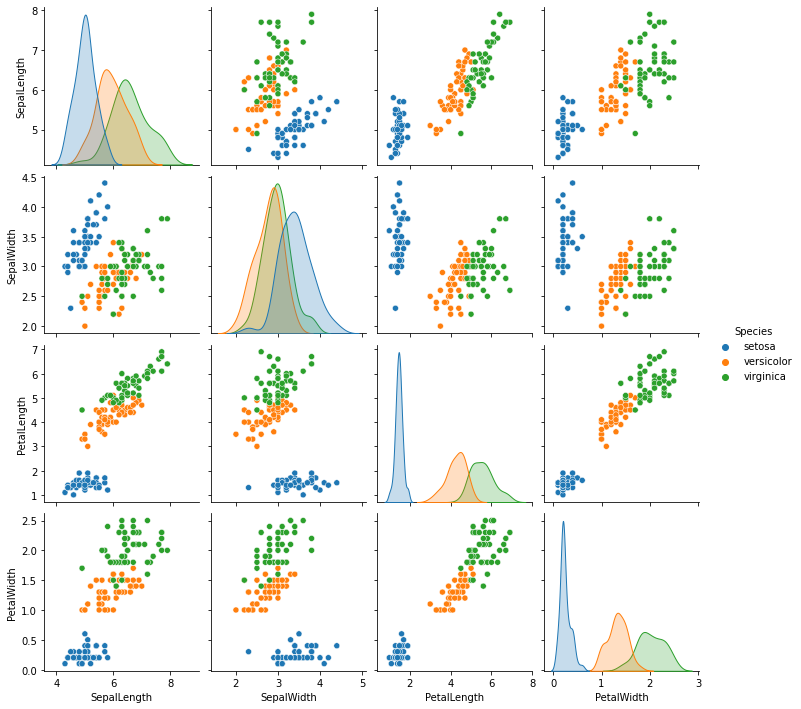

In [8]:
sns.pairplot(df, hue='Species')

**Finding the optimal no. of clusters for K-Means and determining the value of K Using the elbow method :**
K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

**Implementing K-Means Clustering :**

Choose the number of clusters k

Select k random points from the data as centroids

Assign all the points to the closest cluster centroid
Recompute the centroids of newly formed clusters
Repeat steps 3 and 4
We will compute and plot the sum of squared distances against the different values of k (starting from 1).

In [9]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

**Plotting The Elbow Graph To Find Optimal Value Of 'K'**

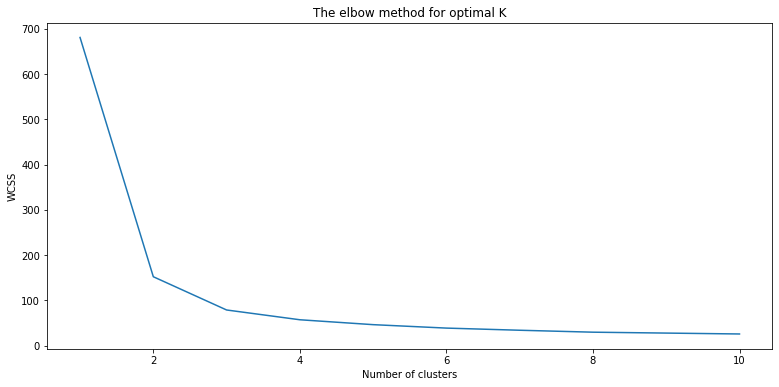

In [10]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(13,6))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method for optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The optimal number of clusters is given by the sharp turn in the Elbow graph. In this case, the optimal number is 3.

**Creating K-Means Clustering**

In [11]:
# Applying kmeans to the dataset 
# Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)
print(iris_k_mean_model.labels_)
print(iris_k_mean_model.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


**Visualizing The Cluster Data**

Text(0.5, 1.0, 'K-Means Clustering')

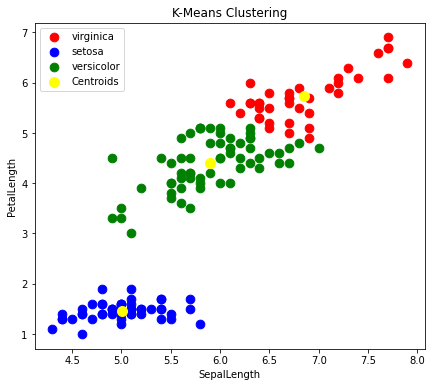

In [12]:
# Visualising the clusters 
# Preferably on the first two columns

plt.figure(figsize=(7,6))
plt.scatter(df.iloc[y_kmeans==0,0],df.iloc[y_kmeans==0,2],s=75,c='red',label='virginica')
plt.scatter(df.iloc[y_kmeans==1,0],df.iloc[y_kmeans==1,2],s=75,c='blue',label='setosa')
plt.scatter(df.iloc[y_kmeans==2,0],df.iloc[y_kmeans==2,2],s=75,c='green',label='versicolor')
plt.scatter(iris_k_mean_model.cluster_centers_[:,0],iris_k_mean_model.cluster_centers_[:,2],s=100,c='yellow',label='Centroids')
plt.legend()
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.title('K-Means Clustering')

**3D Visualization Of The Clusters**

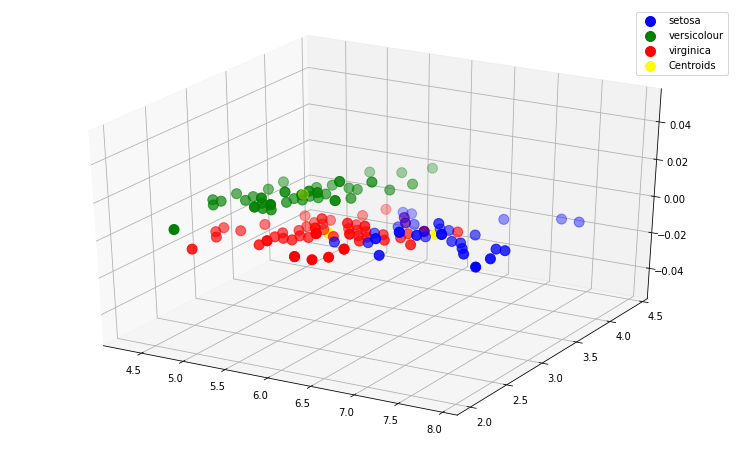

In [13]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (13,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], 
            s = 100, c = 'red', label = 'virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()


# **Thank You!!**